# Delivery Duration Prediction Project

*By Nguyễn Trí Cao Sơn*

This is my own solution to the Delivery Duration Prediction Project by DoorDash. For further information, please go to the original assignment: https://platform.stratascratch.com/data-projects/delivery-duration-prediction

The main goal of this project is to predict the total delivery duration from the moment a customer makes an online order to the moment the order is delivered to that customer's door.

I intend to build 3 models: Linear Regression, Regression Tree and Regression Random Forest. I'll use R squared, mean absolute error, mean squared error and root mean squared error as 4 main metrics to evaluate the mentioned models.

The evaluation process will be conducted on test data. Ideally, I should conduct it on validation data and let the test data remain unseen throughout the model building phase. But I'll go with the former approach for now.

# DATA EXPLORATION

Import several packages necessary for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_column", None)

Import and check data.

In [2]:
df = pd.read_csv("historical_data.csv")
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [3]:
df.shape

(197428, 16)

Check data types and null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

Check number of rows with missing values.

In [5]:
df.isna().any(axis = 1).sum()

21651

Check percentage of missing values in each column

In [6]:
df.isna().mean() * 100

market_id                                       0.499929
created_at                                      0.000000
actual_delivery_time                            0.003546
store_id                                        0.000000
store_primary_category                          2.411006
order_protocol                                  0.503981
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           8.236927
total_busy_dashers                              8.236927
total_outstanding_orders                        8.236927
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.266426
dtype: float64

The 3 columns total_onshift_dashers, total_busy_dashers and total_outstanding_orders all have about 8% missing values.


In [7]:
trio_missing = df[df["total_onshift_dashers"].isna()]
trio_missing

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,976,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN,251,671.0
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,976,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN,251,893.0
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,976,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN,251,479.0
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,976,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN,251,1104.0
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,976,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN,251,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,5382,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN,251,725.0
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,5382,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN,251,683.0
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,5382,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN,251,725.0
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,5382,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN,251,820.0


In [8]:
print(trio_missing["total_onshift_dashers"].isna().sum())
print(trio_missing["total_busy_dashers"].isna().sum())
print(trio_missing["total_outstanding_orders"].isna().sum())

16262
16262
16262


The above results show that 3 columns are missing together.

Let's see why they're missing.

First, let's define a function:

In [9]:
def huh(col):
    x1 = trio_missing[col].value_counts().reset_index(name = "a")
    x2 = df[col].value_counts().reset_index(name = "b")
    x = x1.merge(x2, left_on = x1["index"], right_on = x2["index"], how = "inner")
    x["percentage"] = x["a"] / x["b"] * 100
    return x[["index_x", "percentage"]]
huh("market_id")

,index_x,percentage
0,6.0,95.467128
1,3.0,6.953685
2,2.0,0.490392
3,4.0,0.451690
4,1.0,0.531062
5,5.0,0.511111


We can see from the results that market id 6 has a substantially high number of missing values in those 3 columns mentioned above. In other words, data relevant to dashers status are most likely to be missing in market id 6.

The reason for this is to be further investigated.



The goal of the project is to predict the time it would take deliver food from restaurants to customers. Therefore, we'll alter the time data to datetime format and calculate the delivery duration in seconds. 

However, we must remove missing values from all the time data first.

In [10]:
from datetime import datetime as dt
df = df.dropna(subset = ["created_at", "actual_delivery_time"])
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

We'll name our target variable "real_time".

In [11]:
df["real_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()

Also, we can simplify our model by creating a new feature that captures the percentage of total busy dasher of each purchase. This could also help us better handle predictive models that are sensitive to multicollinearity. Also a feature that estimates the combined time of estimated_order_place_duration and estimated_store_to_consumer_driving_duration would be good.

In [12]:
df["busy_dasher_pct"] = df["total_busy_dashers"] / df["total_onshift_dashers"] * 100
df["estimated_combined_duration"] = df["estimated_order_place_duration"] + df["estimated_store_to_consumer_driving_duration"]

I also add an "hour" column to specify at what time an order is made.

In [13]:
df["hour"] = df["created_at"].dt.hour.astype("category")

However, our time data is in UTC. We should convert it to original local time for better analysis.

In [14]:
def utc(x):
    if x - 8 < 0:
        a = x + 24 - 8
    else:
        a = x - 8
    return a
df["hour"] = df["hour"].apply(utc)

I'll label orders created from 11 am to 1 pm and 5 pm to 7 pm as "rush" and the others are non_rush.

In [15]:
df["rush_hour"] = df["hour"].apply(lambda x: "rush" if x in [11,12,13,17,18,19] else "non_rush")

Also, market_id, store_id and order_protocol are categorical so I'll change them to category data type.

In [16]:
df["market_id"] = df["market_id"].astype("category")
df["order_protocol"] = df["order_protocol"].astype("category")
df["store_id"] = df["store_id"].astype("category")

Since we are unable to find out what those missing data points are, we may remove the missing data.

In [17]:
df2 = df.dropna()

# EXPLORE OUTLIERS

After handling missing values, our next step is to investigate outliers.

I'll check for any duplicates first.


In [18]:
df2.duplicated().sum()

0

Good, there are no duplicated instances.

We'll count the number of unique values from our categorical variables.

In [19]:
for x in ["market_id","store_id","store_primary_category","order_protocol","hour"]:
    a = df2[x].nunique()
    print(f"Number of unique value of {x}: {a}")

Number of unique value of market_id: 6
Number of unique value of store_id: 5480
Number of unique value of store_primary_category: 73
Number of unique value of order_protocol: 7
Number of unique value of hour: 18


Hmm, number of unique value of hour is only 18. I'll investigate further.

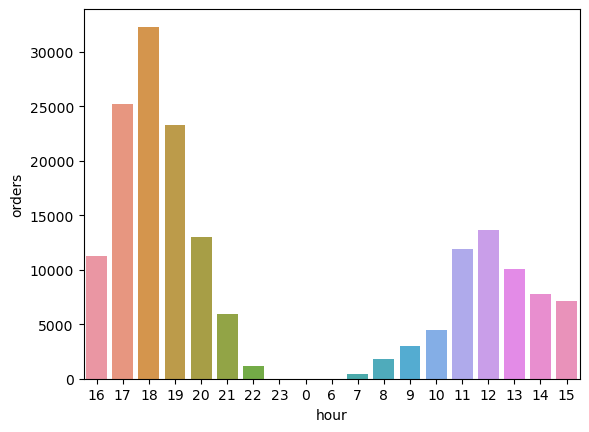

In [20]:
h = df2["hour"].value_counts().reset_index()
sns.barplot(data = h, x = "index", y = "hour")
plt.xlabel("hour")
plt.ylabel("orders")
plt.show()

There are little to no orders around 11 pm to 7 pm. This is considered normal because people usually don't order food when they're sleeping and restaurants and food delivery guys must also rest.

Let's look at data summary.

In [21]:
df2.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration
count,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,172274.000000,1.722740e+05,172274.000000
mean,3.202126,2700.161551,2.672905,685.989110,1162.114956,45.832035,42.712586,59.412581,307.362237,546.076402,2854.197911,NaN,853.438638
std,2.676043,1828.343106,1.622565,520.003299,560.649184,34.289086,31.929567,52.601674,89.605486,218.570479,1401.872124,NaN,234.308337
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,101.000000,-inf,153.000000
25%,2.000000,1419.000000,1.000000,299.000000,799.000000,18.000000,16.000000,18.000000,251.000000,384.000000,2101.000000,8.281250e+01,683.000000
50%,3.000000,2226.000000,2.000000,595.000000,1095.000000,38.000000,36.000000,42.000000,251.000000,544.000000,2655.000000,9.629630e+01,850.000000
75%,4.000000,3418.750000,3.000000,945.000000,1395.000000,66.000000,63.000000,86.000000,446.000000,703.000000,3371.000000,1.000000e+02,1016.000000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,332482.000000,inf,3222.000000


There are several unusual things about the data summary:

    - The min price of items, total on shift dasher, total busy dasher and total outstanding orders have negative values.
    - The subtotal and max price of items have data points of 0.
    - The max total of items, subtotal, number of distinct items, max and min items price and the max value of target variable are quite large.
    - The busy_dasher_pct has infinity values.
    
Our data consists of many outliers. Finding a way to deal with them is crucial for later, especially when building predictive models that are outlier-sensitive.

**Let's resolve the first bullet point: *The min price of items, total on shift dasher, total busy dasher and total outstanding orders have negative values.***

In [22]:
df2[(df2["min_item_price"] < 0) | (df2["total_onshift_dashers"] < 0) 
    | (df2["total_busy_dashers"] < 0) | (df2["total_outstanding_orders"] < 0)].head(30)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0,2681.0,120.833333,972.0,18,rush
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,6740,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,251,587.0,2926.0,109.090909,838.0,21,non_rush
4989,1.0,2015-02-18 00:36:21,2015-02-18 01:12:28,1811,smoothie,2.0,2,1940,1,840,856,11.0,14.0,-2.0,251,460.0,2167.0,127.272727,711.0,16,non_rush
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,90,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,446,266.0,4275.0,-100.000000,712.0,17,rush
7997,1.0,2015-02-08 15:41:45,2015-02-08 16:35:01,6172,sandwich,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0,251,650.0,3196.0,-100.000000,901.0,7,non_rush
12888,3.0,2015-01-21 21:02:32,2015-01-21 21:41:03,2649,catering,2.0,1,986,1,892,827,-2.0,5.0,1.0,251,787.0,2311.0,-250.000000,1038.0,13,rush
19438,3.0,2015-02-03 03:04:22,2015-02-03 04:21:43,275,fast,4.0,3,1778,2,158,869,7.0,10.0,-2.0,251,743.0,4641.0,142.857143,994.0,19,rush
20454,1.0,2015-01-25 21:15:30,2015-01-25 21:51:23,4237,asian,1.0,3,2039,3,393,798,9.0,7.0,-1.0,446,393.0,2153.0,77.777778,839.0,13,rush
22673,1.0,2015-02-10 19:35:28,2015-02-10 20:28:51,4906,japanese,1.0,2,1578,2,441,803,0.0,-1.0,9.0,446,735.0,3203.0,-inf,1181.0,11,rush
23029,1.0,2015-02-08 19:49:17,2015-02-08 21:10:48,5572,korean,1.0,2,1641,2,754,1217,5.0,2.0,-1.0,446,537.0,4891.0,40.000000,983.0,11,rush


After examining the data, we can be quite certain that these are errors in data collection process. Let's remove them.

In [23]:
df2 = df2[(df2["min_item_price"] >= 0) & (df2["total_onshift_dashers"] >= 0) 
    & (df2["total_busy_dashers"] >= 0) & (df2["total_outstanding_orders"] >= 0)]

In [24]:
df2[(df2["min_item_price"] == 0)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour
714,2.0,2015-01-28 01:20:44,2015-01-28 02:08:24,1148,indian,3.0,2,1368,2,0,1200,30.0,29.0,32.0,251,583.0,2860.0,96.666667,834.0,17,rush
798,1.0,2015-02-16 01:16:49,2015-02-16 02:52:49,132,fast,4.0,24,3190,8,0,699,17.0,17.0,24.0,251,585.0,5760.0,100.000000,836.0,17,rush
801,1.0,2015-02-03 03:36:16,2015-02-03 05:13:04,132,fast,4.0,7,1223,5,0,649,22.0,22.0,48.0,251,384.0,5808.0,100.000000,635.0,19,rush
803,1.0,2015-01-25 21:38:45,2015-01-25 22:14:22,132,fast,4.0,6,958,6,0,599,17.0,9.0,9.0,251,765.0,2137.0,52.941176,1016.0,13,rush
1042,4.0,2015-01-23 05:28:02,2015-01-23 05:54:50,5171,italian,3.0,5,3955,5,0,1395,41.0,22.0,17.0,251,723.0,1608.0,53.658537,974.0,21,non_rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196531,1.0,2015-01-28 19:33:39,2015-01-28 19:58:24,6235,fast,4.0,13,487,4,0,209,7.0,6.0,5.0,251,257.0,1485.0,85.714286,508.0,11,rush
196815,4.0,2015-01-21 19:57:24,2015-01-21 20:32:29,6964,pizza,3.0,2,1395,2,0,695,44.0,41.0,56.0,251,199.0,2105.0,93.181818,450.0,11,rush
197200,1.0,2015-02-15 22:15:36,2015-02-15 22:42:14,3803,fast,4.0,9,946,5,0,299,24.0,17.0,17.0,251,383.0,1598.0,70.833333,634.0,14,non_rush
197201,1.0,2015-02-09 05:16:26,2015-02-09 05:48:49,3803,fast,4.0,6,348,3,0,169,20.0,20.0,18.0,251,624.0,1943.0,100.000000,875.0,21,non_rush


The reason I didn't exclude data points with a minimum item price of 0 is that they appear to be legitimate.

**Next, let's resolve the second bullet point: *The subtotal and max price of items have data points of 0.***

In [25]:
df2[(df2["subtotal"] == 0) | (df2["max_item_price"] == 0)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0,2068.0,366.666667,492.0,9,non_rush
1837,2.0,2015-02-07 17:25:00,2015-02-07 17:55:00,6740,fast,4.0,5,0,2,169,200,19.0,13.0,13.0,251,512.0,1800.0,68.421053,763.0,9,non_rush
3947,1.0,2015-01-31 01:42:46,2015-01-31 02:06:18,414,japanese,3.0,2,0,2,405,1395,16.0,16.0,16.0,251,200.0,1412.0,100.000000,451.0,17,rush
4240,1.0,2015-02-12 19:15:20,2015-02-12 19:49:09,490,breakfast,3.0,1,0,1,1495,1495,16.0,16.0,20.0,251,556.0,2029.0,100.000000,807.0,11,rush
7360,4.0,2015-01-25 02:09:31,2015-01-25 03:21:28,703,greek,2.0,2,0,2,1799,2599,61.0,80.0,103.0,251,139.0,4317.0,131.147541,390.0,18,rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190853,1.0,2015-01-28 02:21:37,2015-01-28 03:02:12,2169,indian,3.0,5,0,5,350,1195,51.0,53.0,62.0,251,478.0,2435.0,103.921569,729.0,18,rush
192276,4.0,2015-02-08 04:23:01,2015-02-08 06:00:42,5956,filipino,1.0,2,0,2,625,963,5.0,6.0,16.0,446,513.0,5861.0,120.000000,959.0,20,non_rush
192751,1.0,2015-01-26 03:54:50,2015-01-26 04:27:15,440,burger,3.0,5,0,3,800,1800,38.0,39.0,39.0,251,365.0,1945.0,102.631579,616.0,19,rush
193233,5.0,2015-02-14 02:34:45,2015-02-14 04:05:37,5020,latin-american,1.0,1,0,1,1200,1200,26.0,24.0,41.0,446,568.0,5452.0,92.307692,1014.0,18,rush


This also indicates that there is an error while inputing data into the the database. Let's remove them as well.

In [26]:
df2 = df2[(df2["subtotal"] > 0) & (df2["max_item_price"] > 0)]

**Let's resolve the third bullet point: *The max total of items, subtotal, number of distinct items, max and min items price and the max value of target variable are quite large.***

I'll define some functions to output the numbers of outliers and extract extreme outliers.

In [27]:
def n_out(df,col,threshold):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + threshold * iqr
    lower = df[col].quantile(0.25) - threshold * iqr
    num = ((df[col] > upper) | (df[col] < lower)).sum()
    return num
    
def out(df,col,threshold):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + threshold * iqr
    lower = df[col].quantile(0.25) - threshold * iqr
    haiz = df[(df[col] > upper) | (df[col] < lower)]
    return haiz


In [28]:
for x in ["subtotal","min_item_price","max_item_price","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","real_time"]:
    a = n_out(df2,x,1.5)
    print(f"Number of outliers for {x}: {a}")

Number of outliers for subtotal: 7840
Number of outliers for min_item_price: 3965
Number of outliers for max_item_price: 6804
Number of outliers for total_onshift_dashers: 1312
Number of outliers for total_busy_dashers: 549
Number of outliers for total_outstanding_orders: 4979
Number of outliers for real_time: 5381


Let's check for extreme outliers with 3 times the interquartile range threshold.

In [29]:
for x in ["subtotal","min_item_price","max_item_price","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","real_time"]:
    a = n_out(df2,x,3)
    print(f"Number of extreme outliers for {x}: {a}")

Number of extreme outliers for subtotal: 1743
Number of extreme outliers for min_item_price: 1149
Number of extreme outliers for max_item_price: 1617
Number of extreme outliers for total_onshift_dashers: 0
Number of extreme outliers for total_busy_dashers: 0
Number of extreme outliers for total_outstanding_orders: 0
Number of extreme outliers for real_time: 916


The amount of extreme outliers in the dataset is quite troublesome. 

Let's handle outliers of subtotal, min_item_price and max_item_price at the same time. 

In [30]:
out(df2, "min_item_price", 3).sort_values("min_item_price", ascending = False).head(30)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour
139718,3.0,2015-02-04 01:35:22,2015-02-04 03:02:37,2580,breakfast,5.0,1,14700,1,14700,14700,23.0,21.0,22.0,251,934.0,5235.0,91.304348,1185.0,17,rush
46914,1.0,2015-02-15 03:40:15,2015-02-15 04:54:56,6626,pizza,5.0,1,9264,1,8999,8999,50.0,50.0,100.0,251,337.0,4481.0,100.000000,588.0,19,rush
195513,2.0,2015-02-14 03:38:56,2015-02-14 04:40:42,389,american,1.0,1,8959,1,8959,8959,143.0,131.0,274.0,446,308.0,3706.0,91.608392,754.0,19,rush
90756,4.0,2015-02-16 04:22:13,2015-02-16 05:00:42,5097,chinese,3.0,1,9465,1,8415,8415,85.0,76.0,90.0,251,803.0,2309.0,89.411765,1054.0,20,non_rush
84085,3.0,2015-02-02 01:06:58,2015-02-02 02:36:04,1018,barbecue,1.0,1,7999,1,7999,7999,22.0,22.0,26.0,446,530.0,5346.0,100.000000,976.0,17,rush
62349,2.0,2015-01-24 01:46:14,2015-01-24 02:38:35,1241,japanese,1.0,1,7500,1,7500,7500,88.0,82.0,119.0,446,242.0,3141.0,93.181818,688.0,17,rush
999,2.0,2015-01-28 00:45:38,2015-01-28 01:15:26,4062,barbecue,3.0,1,7475,1,7475,7475,15.0,14.0,14.0,251,477.0,1788.0,93.333333,728.0,16,non_rush
181984,3.0,2015-02-15 22:29:30,2015-02-15 23:18:31,1326,american,5.0,1,7422,1,7259,7210,31.0,35.0,29.0,251,682.0,2941.0,112.903226,933.0,14,non_rush
178187,4.0,2015-02-08 20:45:07,2015-02-08 21:11:27,2457,dessert,2.0,1,7080,1,7080,7080,57.0,47.0,62.0,251,477.0,1580.0,82.456140,728.0,12,rush
32239,2.0,2015-02-04 21:52:12,2015-02-04 22:46:05,3995,dessert,2.0,2,14160,1,7080,7080,23.0,19.0,20.0,251,701.0,3233.0,82.608696,952.0,13,rush


Upon examining the extreme outliers of min_item_price and max_item_price, they seem to be meaningful. The relationship between subtotal, min and max items price are reasonable as well. Without much information, we can't know for sure whether these outliers are really meaningful or they're just errors. Let's leave them as is.

To find unusual data points in subtotal, we can check if the total amount of money paid is within a reasonable range. More specifically, subtotal must be between total_items * min_item_price and total_items * max_item_price. However we must first check the lower and upper bound of subtotal for certainty.

In [31]:
check = df2.copy()
check["avg_price"] = check["subtotal"] / check["total_items"]
check["avg_max_ratio"] = check["avg_price"] / check["max_item_price"]
check["avg_min_ratio"] = check["avg_price"] / check["min_item_price"]
check[check["avg_min_ratio"] > 1]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour,avg_price,avg_max_ratio,avg_min_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,42.424242,1307.0,14,non_rush,860.250000,0.694310,1.544434
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,200.000000,1136.0,13,rush,1900.000000,1.357143,1.357143
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,75.000000,735.0,16,non_rush,1192.750000,0.743610,1.454573
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,100.000000,651.0,18,rush,1810.000000,0.824601,1.270175
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,2841,italian,1.0,3,4475,3,925,1825,4.0,1.0,1.0,446,542.0,5267.0,25.000000,988.0,16,non_rush,1491.666667,0.817352,1.612613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,100.000000,582.0,16,non_rush,463.000000,0.713405,1.342029
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,91.666667,1166.0,16,non_rush,501.666667,0.608081,1.238683
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,105.128205,1046.0,20,non_rush,367.200000,0.920301,1.224000
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,100.000000,830.0,10,non_rush,1175.000000,2.196262,2.196262


In some cases, the subtotal is larger than the price item. This could be due to fee and charges. While in other cases where subtotal is smaller than item price, vouchers could have been used to reduce the total payment money.

In [32]:
check[["avg_max_ratio", "avg_min_ratio"]].describe()

,avg_max_ratio,avg_min_ratio
count,172021.000000,1.720210e+05
mean,0.867151,inf
std,0.291521,NaN
min,0.010318,1.555506e-02
25%,0.680365,1.108303e+00
50%,0.857143,1.460317e+00
75%,1.000000,2.188889e+00
max,11.229167,inf


The max value of avg_max_ratio and the min value of avg_min_ratio are unusual.

Let's calculate the reasonable range of them.

In [33]:
iqr1 = check["avg_max_ratio"].quantile(0.75) - check["avg_max_ratio"].quantile(0.25)
upper = check["avg_max_ratio"].quantile(0.75) + 1.5 * iqr1
print(upper)

1.4794520547945205


In [34]:
iqr2 = check["avg_min_ratio"].quantile(0.75) - check["avg_min_ratio"].quantile(0.25)
lower = check["avg_min_ratio"].quantile(0.25) - 1.5 * iqr2
print(lower)

-0.5125752105896513


The lower trheshold of -0.51 is quite strange. For simplicity, I'll assume the min value for avg_min_ratio is 0.8, i.e. the maximum discount rate of a purchase is 20%.

So we assume that every data point that has avg_max_ratio <= 1.479 and avg_min_ratio >= 0.8 is meaningful.

Applying this to our data frame, we can sort out unusual subtotal data points.

In [35]:
df22 = check[(check["avg_max_ratio"] <= upper) & (check["avg_min_ratio"] >= 0.8)]

Although we still have some extreme outliers in total_items, subtotal, min_item_price and max_item_price, there's no reason to remove actual and meaningful data just to make our models perform better.

Next, let's check our target variable.

In [36]:
out(df22,"real_time",3).sort_values("real_time")

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour,avg_price,avg_max_ratio,avg_min_ratio
159403,3.0,2015-02-17 05:09:40,2015-02-17 07:09:21,3437,cafe,4.0,4,1785,4,345,365,5.0,2.0,2.0,446,501.0,7181.0,40.000000,947.0,21,non_rush,446.250000,1.222603,1.293478
29282,4.0,2015-02-02 02:23:48,2015-02-02 04:23:32,6514,other,3.0,1,1300,1,950,950,48.0,47.0,88.0,251,671.0,7184.0,97.916667,922.0,18,rush,1300.000000,1.368421,1.368421
48401,1.0,2015-02-16 03:19:03,2015-02-16 05:18:47,6263,pizza,5.0,3,2825,2,595,735,49.0,49.0,113.0,251,505.0,7184.0,100.000000,756.0,19,rush,941.666667,1.281179,1.582633
5267,3.0,2015-02-03 02:50:29,2015-02-03 04:50:15,3883,italian,1.0,3,4485,2,795,1495,9.0,8.0,13.0,446,504.0,7186.0,88.888889,950.0,18,rush,1495.000000,1.000000,1.880503
124114,4.0,2015-02-02 02:21:05,2015-02-02 04:20:53,2056,chinese,3.0,3,3985,3,1095,1495,64.0,62.0,131.0,251,744.0,7188.0,96.875000,995.0,18,rush,1328.333333,0.888517,1.213090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,3247,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,446,540.0,45685.0,98.245614,986.0,20,non_rush,990.000000,1.245283,1.245283
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,1764,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,251,787.0,48178.0,100.000000,1038.0,18,rush,728.333333,0.731993,1.471380
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,2169,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,251,326.0,54447.0,98.591549,577.0,18,rush,915.000000,0.765690,2.440000
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,355,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,251,602.0,57032.0,93.577982,853.0,18,rush,793.000000,1.141007,2.038560


So all above orders take at least 2 hours for it to be delivered to customers, some even take more than a day. 

I'll divide the total duration by the combined duration of estimated_order_place_duration and estimated_store_to_consumer_driving_duration to sort out unusual data.

In [37]:
df22["estimated_cook_time"] = df22["real_time"] - df22["estimated_combined_duration"]
df22.sort_values("estimated_cook_time")

C:\Users\Hi There!\AppData\Local\Temp\ipykernel_6968\2088849748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["estimated_cook_time"] = df22["real_time"] - df22["estimated_combined_duration"]


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour,avg_price,avg_max_ratio,avg_min_ratio,estimated_cook_time
117928,2.0,2015-01-31 00:41:39,2015-01-31 00:47:04,5827,indian,3.0,6,1950,5,100,1050,52.0,54.0,63.0,251,744.0,325.0,103.846154,995.0,16,non_rush,325.000000,0.309524,3.250000,-670.0
84855,2.0,2015-02-04 21:07:52,2015-02-04 21:15:01,4293,american,5.0,1,1376,1,977,1065,42.0,38.0,58.0,251,805.0,429.0,90.476190,1056.0,13,rush,1376.000000,1.292019,1.408393,-627.0
135889,2.0,2015-01-25 05:24:37,2015-01-25 05:30:29,1595,sandwich,2.0,7,2527,4,69,799,51.0,63.0,52.0,251,615.0,352.0,123.529412,866.0,21,non_rush,361.000000,0.451815,5.231884,-514.0
127830,4.0,2015-02-15 06:38:50,2015-02-15 06:55:33,2237,mexican,1.0,4,700,2,150,250,14.0,10.0,6.0,446,1039.0,1003.0,71.428571,1485.0,22,non_rush,175.000000,0.700000,1.166667,-482.0
104797,2.0,2015-01-26 23:22:31,2015-01-26 23:39:34,1034,vietnamese,1.0,1,375,1,375,375,12.0,21.0,11.0,446,1010.0,1023.0,175.000000,1456.0,15,non_rush,375.000000,1.000000,1.000000,-433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,3247,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,446,540.0,45685.0,98.245614,986.0,20,non_rush,990.000000,1.245283,1.245283,44699.0
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,1764,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,251,787.0,48178.0,100.000000,1038.0,18,rush,728.333333,0.731993,1.471380,47140.0
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,2169,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,251,326.0,54447.0,98.591549,577.0,18,rush,915.000000,0.765690,2.440000,53870.0
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,355,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,251,602.0,57032.0,93.577982,853.0,18,rush,793.000000,1.141007,2.038560,56179.0


We can see that some orders are delivered much earlier than expected, while others take absurdly long. I'll use 3 iqr as the threshold to handle outliers.

In [38]:
iqr = df22["estimated_cook_time"].quantile(0.75) - df22["estimated_cook_time"].quantile(0.25)
upper = df22["estimated_cook_time"].quantile(0.75) + 3*iqr
lower = df22["estimated_cook_time"].quantile(0.25) - 3*iqr
df22[(df22["estimated_cook_time"] < lower) | (df22["estimated_cook_time"] > upper)].sort_values("real_time")

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,hour,rush_hour,avg_price,avg_max_ratio,avg_min_ratio,estimated_cook_time
92445,4.0,2015-02-02 02:16:22,2015-02-02 04:06:07,6758,italian,1.0,3,1439,3,275,629,86.0,86.0,152.0,251,189.0,6585.0,100.000000,440.0,18,rush,479.666667,0.762586,1.744242,6145.0
133351,4.0,2015-02-02 01:31:34,2015-02-02 03:22:42,4880,american,5.0,1,1190,1,995,995,55.0,53.0,76.0,251,268.0,6668.0,96.363636,519.0,17,rush,1190.000000,1.195980,1.195980,6149.0
138958,1.0,2015-02-05 03:05:00,2015-02-05 04:56:19,6947,mexican,5.0,2,1690,1,845,845,45.0,46.0,78.0,251,145.0,6679.0,102.222222,396.0,19,rush,845.000000,1.000000,1.000000,6283.0
9472,4.0,2015-02-02 03:01:20,2015-02-02 04:53:03,2242,burger,4.0,4,1307,4,269,729,10.0,10.0,21.0,251,222.0,6703.0,100.000000,473.0,19,rush,326.750000,0.448217,1.214684,6230.0
149205,3.0,2015-02-02 23:30:39,2015-02-03 01:22:28,3021,mexican,3.0,1,1594,1,1299,1299,11.0,14.0,16.0,251,252.0,6709.0,127.272727,503.0,15,non_rush,1594.000000,1.227098,1.227098,6206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,3247,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,446,540.0,45685.0,98.245614,986.0,20,non_rush,990.000000,1.245283,1.245283,44699.0
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,1764,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,251,787.0,48178.0,100.000000,1038.0,18,rush,728.333333,0.731993,1.471380,47140.0
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,2169,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,251,326.0,54447.0,98.591549,577.0,18,rush,915.000000,0.765690,2.440000,53870.0
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,355,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,251,602.0,57032.0,93.577982,853.0,18,rush,793.000000,1.141007,2.038560,56179.0


We have another 1000 unusual data points. Might as well remove them. I hope after all this we still have some data left to analyze * sigh *.

In [39]:
df22 = df22[(df22["estimated_cook_time"] > lower) & (df22["estimated_cook_time"] < upper)]

**Finally the last bullet point: *The busy_dasher_pct has infinity values.***

In [40]:
df22.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,avg_price,avg_max_ratio,avg_min_ratio,estimated_cook_time
count,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,1.663540e+05,166354.000000,166354.000000,166354.000000,1.663540e+05,166354.000000
mean,3.243787,2719.341260,2.709036,682.737085,1170.895903,45.999736,42.854323,59.570675,307.538478,545.860190,2817.818940,inf,853.398668,964.683940,0.841385,inf,1964.420272
std,2.683916,1833.700691,1.622574,521.693749,561.026764,34.313877,31.954359,52.626490,89.681276,218.453589,1004.493892,NaN,234.228964,498.924172,0.224708,NaN,966.204843
min,1.000000,100.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000e+00,153.000000,7.579075,0.025348,8.000000e-01,-670.000000
25%,2.000000,1429.000000,2.000000,299.000000,809.000000,18.000000,16.000000,18.000000,251.000000,383.000000,2100.000000,8.271605e+01,683.000000,646.666667,0.676471,1.101101e+00,1269.000000
50%,3.000000,2250.000000,2.000000,595.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,544.000000,2650.000000,9.620253e+01,850.000000,892.857143,0.848485,1.437500e+00,1792.000000
75%,4.000000,3450.000000,3.000000,941.750000,1399.000000,67.000000,63.000000,87.000000,446.000000,702.000000,3356.000000,1.000000e+02,1016.000000,1179.000000,1.000000,2.197310e+00,2473.000000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8113.000000,inf,3222.000000,14700.000000,1.479452,inf,6131.000000


The max value of infinity comes from dividing by 0. In other words, that order has no available dasher within a radius of 10 miles at the time the order was made. So it takes more time to find a dasher and deliver the food to customers.

I'll impute all infinity values to the upper threshold of extreme outliers (3 times iqr) and remove the extreme outliers of busy_dasher_pct. Since it's normal to have a really low percentage of busy dasher, I'll set the lower threshold to 0.

In [41]:
iqr = df22["busy_dasher_pct"].quantile(0.75) - df22["busy_dasher_pct"].quantile(0.25)
upper = df22["busy_dasher_pct"].quantile(0.75) + 3*iqr
lower = 0

In [42]:
def impute(x):
    if np.isfinite(x) == False:
        a = upper
    else:
        a = x
    return a

In [43]:
df22["busy_dasher_pct"] = df22["busy_dasher_pct"].apply(impute)

In [44]:
df22.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,real_time,busy_dasher_pct,estimated_combined_duration,avg_price,avg_max_ratio,avg_min_ratio,estimated_cook_time
count,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,166354.000000,1.663540e+05,166354.000000
mean,3.243787,2719.341260,2.709036,682.737085,1170.895903,45.999736,42.854323,59.570675,307.538478,545.860190,2817.818940,95.058205,853.398668,964.683940,0.841385,inf,1964.420272
std,2.683916,1833.700691,1.622574,521.693749,561.026764,34.313877,31.954359,52.626490,89.681276,218.453589,1004.493892,39.819170,234.228964,498.924172,0.224708,NaN,966.204843
min,1.000000,100.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000,153.000000,7.579075,0.025348,8.000000e-01,-670.000000
25%,2.000000,1429.000000,2.000000,299.000000,809.000000,18.000000,16.000000,18.000000,251.000000,383.000000,2100.000000,82.716049,683.000000,646.666667,0.676471,1.101101e+00,1269.000000
50%,3.000000,2250.000000,2.000000,595.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,544.000000,2650.000000,96.202532,850.000000,892.857143,0.848485,1.437500e+00,1792.000000
75%,4.000000,3450.000000,3.000000,941.750000,1399.000000,67.000000,63.000000,87.000000,446.000000,702.000000,3356.000000,100.000000,1016.000000,1179.000000,1.000000,2.197310e+00,2473.000000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8113.000000,3100.000000,3222.000000,14700.000000,1.479452,inf,6131.000000


The infinity problem has been handled. Unfortunately, our precious data is going to be removed yet again. And I don't even know if I've made a good decision.

In [45]:
df22 = df22[(df22["busy_dasher_pct"] >= lower) & (df22["busy_dasher_pct"] <= upper)]

From now on, we'll focus on our engineered features.

In [46]:
df3 = df22.drop(columns = ["avg_max_ratio", "avg_min_ratio","total_items","subtotal","total_onshift_dashers","total_busy_dashers",
                          "estimated_order_place_duration","estimated_store_to_consumer_driving_duration","estimated_cook_time"])

In [47]:
df3.describe()

,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,real_time,busy_dasher_pct,estimated_combined_duration,avg_price
count,161704.000000,161704.000000,161704.000000,161704.000000,161704.000000,161704.000000,161704.000000,161704.000000
mean,2.712883,682.950143,1172.421579,60.320011,2825.467818,91.366230,853.787550,965.552383
std,1.623867,521.454629,561.668277,53.021408,1005.688844,20.029742,234.352659,498.688553
min,1.000000,0.000000,75.000000,0.000000,101.000000,0.000000,153.000000,7.579075
25%,2.000000,299.000000,815.000000,19.000000,2107.000000,82.051282,683.000000,647.500000
50%,2.000000,595.000000,1095.000000,43.000000,2658.000000,95.798319,850.000000,894.500000
75%,3.000000,942.000000,1399.000000,88.000000,3365.000000,100.000000,1017.000000,1180.000000
max,20.000000,14700.000000,14700.000000,285.000000,8113.000000,151.851852,3222.000000,14700.000000


In conclusion, our dataset contains a lot of outliers. Without much knowledge and experience on the food delivery field as well as data analysis field, I still lack the skills needed to handle these outliers. I did it the easy way: remove those that are considered extreme outliers with the risk that they're actual data points. 

*If you're reading this, I hope you'd have all the skills needed to solve this problem by then. I believe in you my future self*.

# DATA VISUALIZATION

First, let's create some box plots.

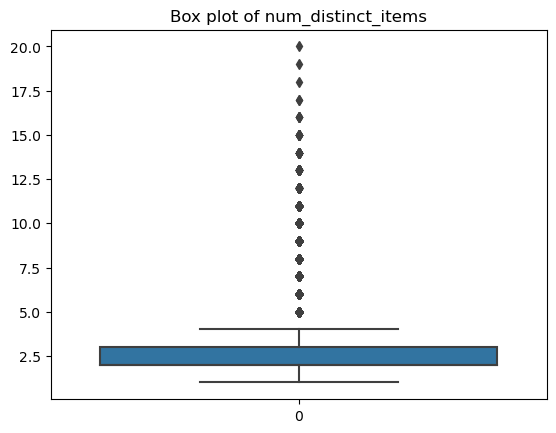

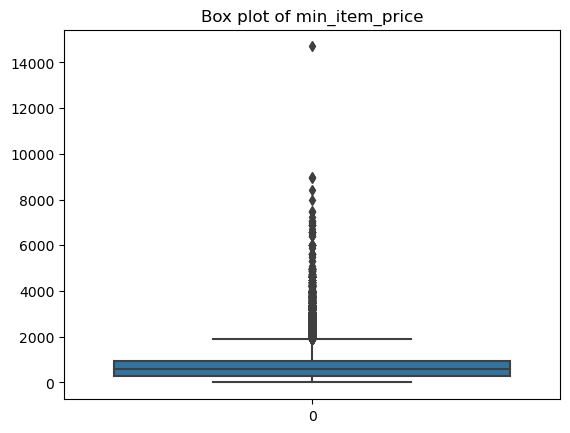

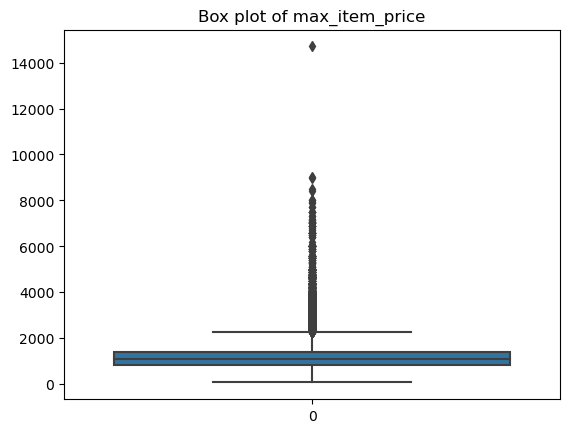

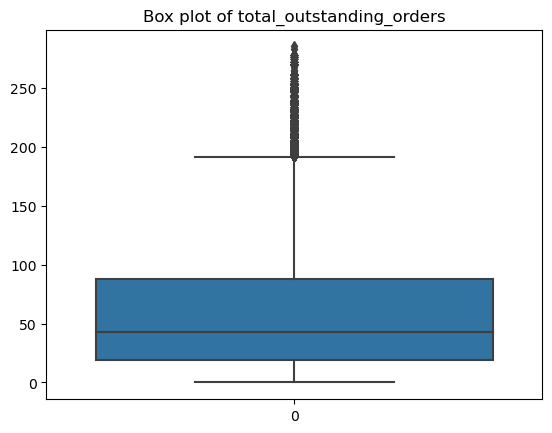

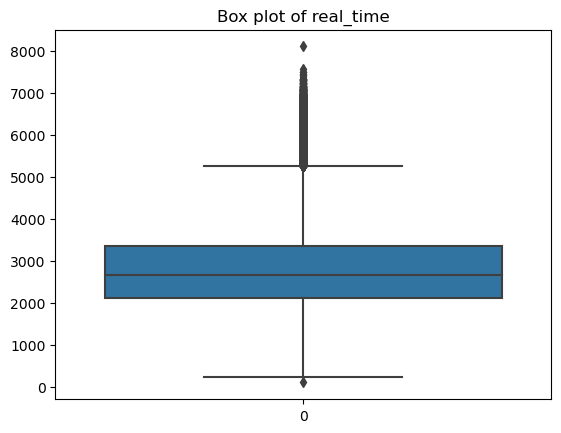

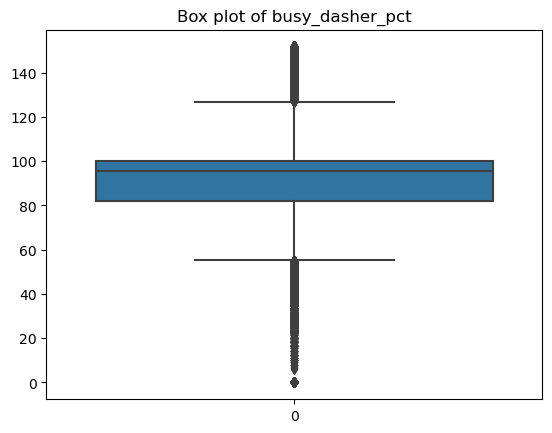

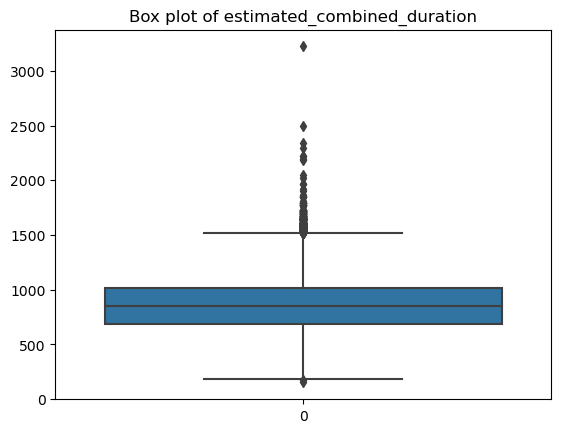

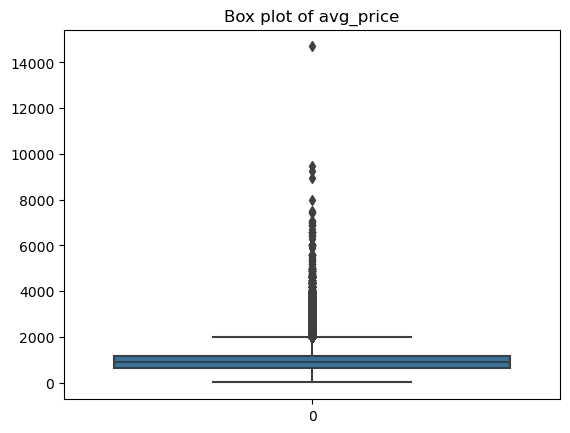

In [48]:
for x in ["num_distinct_items","min_item_price","max_item_price","total_outstanding_orders","real_time","busy_dasher_pct",
         "estimated_combined_duration", "avg_price"]:
    sns.boxplot(df3[x])
    plt.title(f"Box plot of {x}")
    plt.show()

Our data still contain outliers. But they're probably meaningful and legitimate.

Let's examine the relationship between the target and predictor variables.

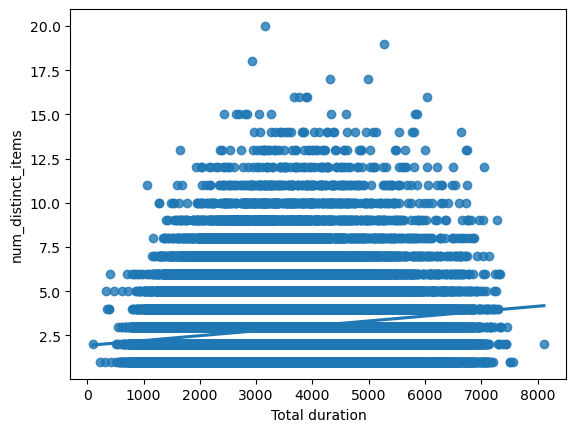

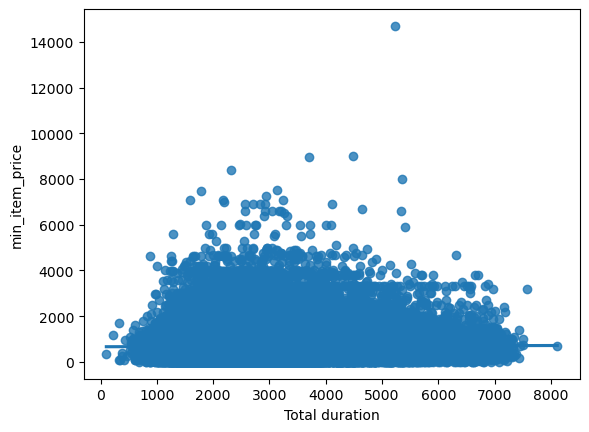

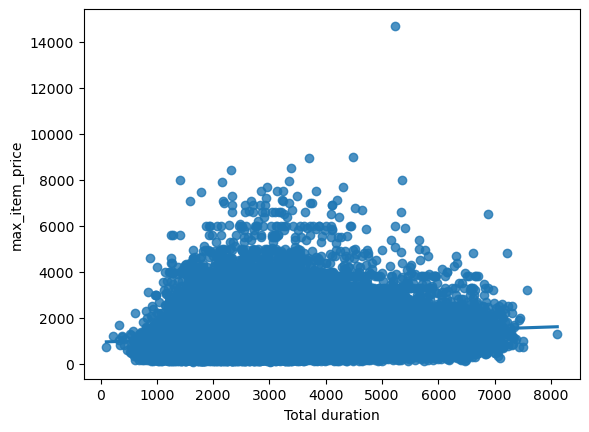

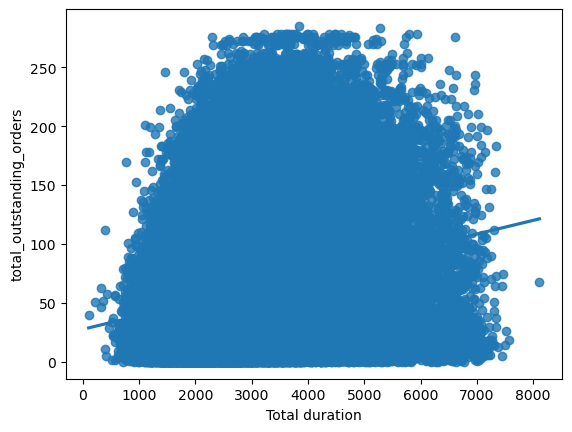

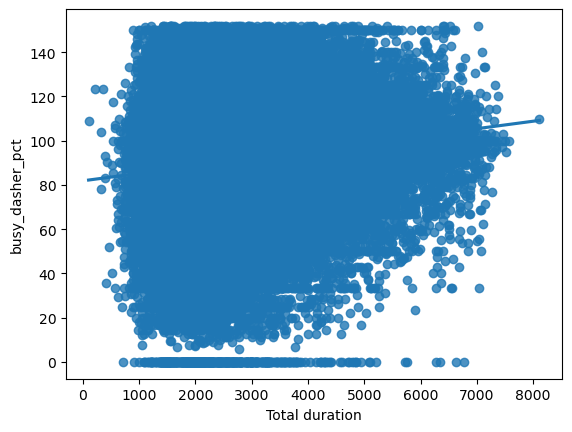

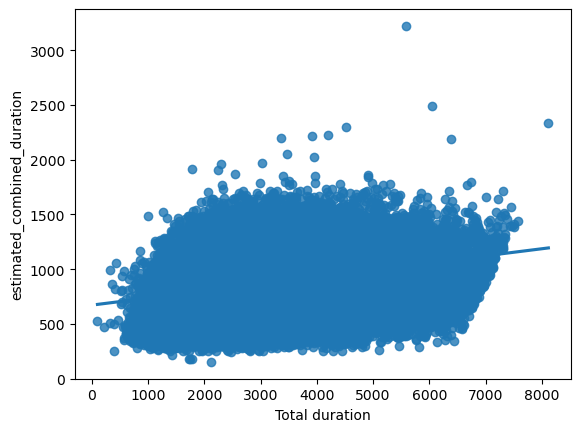

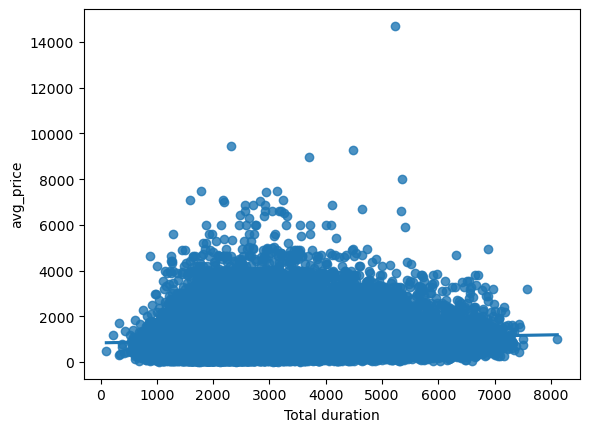

In [49]:
for col in ["num_distinct_items","min_item_price","max_item_price","total_outstanding_orders","busy_dasher_pct",
           "estimated_combined_duration","avg_price"]:
    sns.regplot(data = df3, x = "real_time", y = col)
    plt.xlabel("Total duration")
    plt.ylabel(f"{col}")
    plt.show()

There seems to be linear relationships between predictor and target variables.

Let's create a correlation heatmap.

C:\Users\Hi There!\AppData\Local\Temp\ipykernel_6968\3100397093.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df3.corr(), vmin = -1, vmax = 1, cmap = "crest", annot = True)


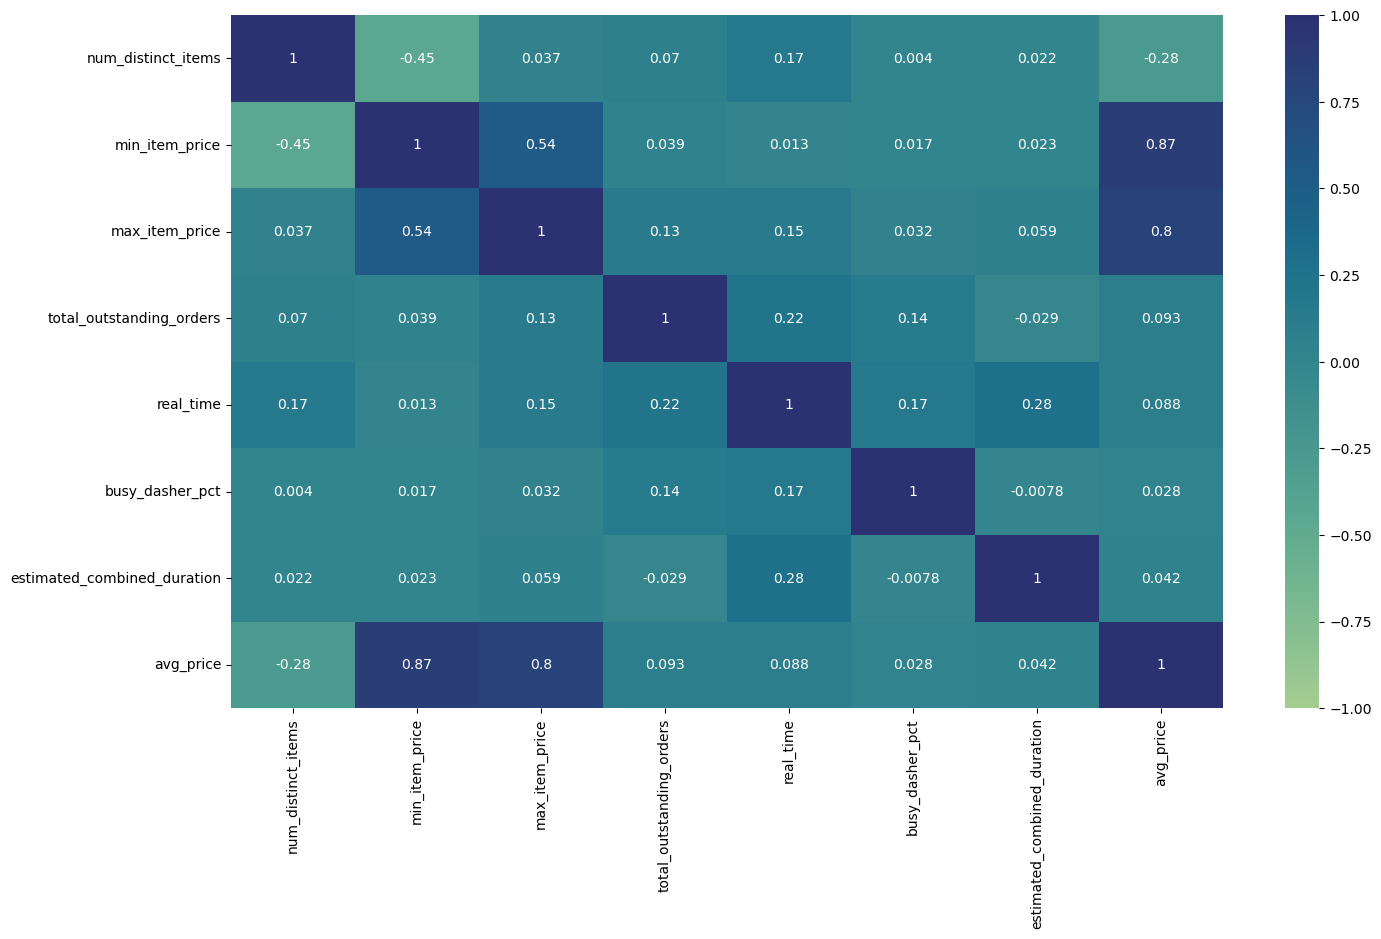

In [50]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df3.corr(), vmin = -1, vmax = 1, cmap = "crest", annot = True)

There are indeed linear relationships, but some of the predictors variables are correlated as well. This could create multicollinearity. We'll handle this later.

Now let's examine the categorical variables.

In [51]:
def agg(col):
    x = df3.groupby(col).agg(avg_time = ("real_time", "mean")).reset_index()
    return x

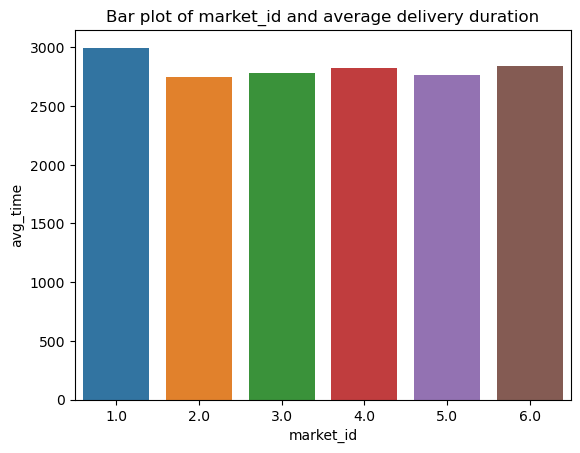

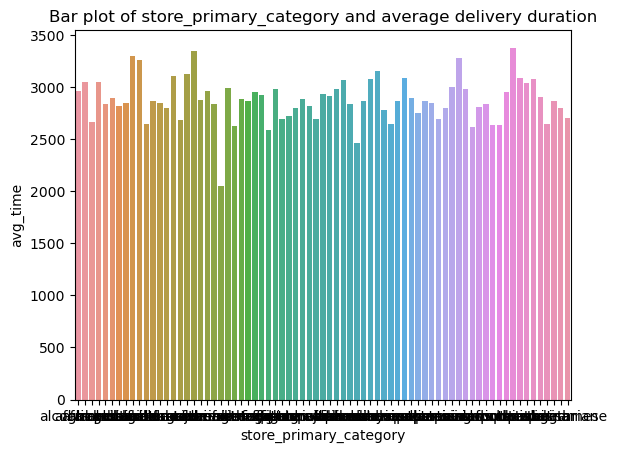

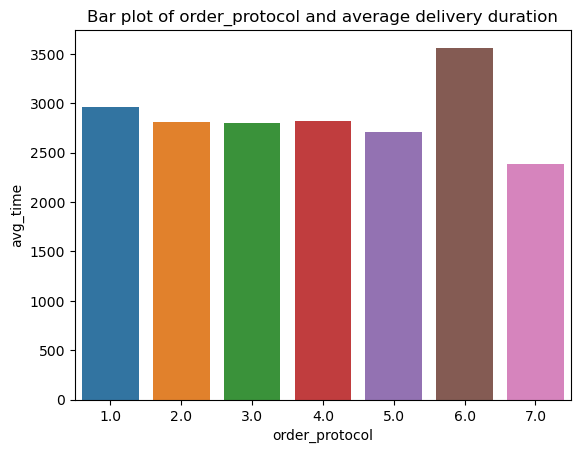

In [52]:
for col in ["market_id", "store_primary_category", "order_protocol"]:
    sns.barplot(data = agg(col), x = col, y = "avg_time")
    plt.title(f"Bar plot of {col} and average delivery duration")
    plt.show()

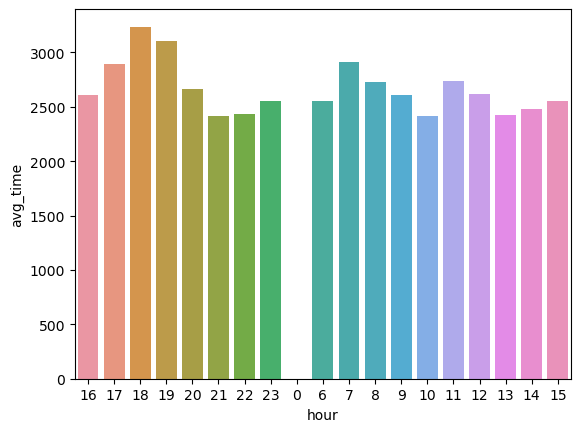

In [53]:
r = df3.groupby("hour").agg(avg_time = ("real_time", "mean")).reset_index()
sns.barplot(data = r, x = "hour", y = "avg_time")
plt.xlabel("hour")
plt.ylabel("avg_time")
plt.show()

The above graph presents the average total duration of food delivery orders for each hour of a day. 

As mentioned earlier, people rarely place a food delivery order from 0 to 5 am so the average waiting time can not be presented in this interval.

The average delivery duration between 5 and 8 pm is higher compared to the rest of a day. This aligns with dinner rush hours. However, the waiting time doesn't increase at noon break. Instead, it reaches its peak in around 7 am. This is probably due to the lack of dashers at that time.

# MODEL BUILDING

We'll import some model building packages.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

Let's create a dataframe suitable for model building.

In [108]:
df4 = df3.drop(columns = ["created_at","actual_delivery_time","min_item_price","max_item_price","store_id"])

I decided to drop min_item_price and max_item_price because they are highly correlated with avg_price and may cause multicollinearity.

Let's also encode the categorical variables. 

In [109]:
df4 = pd.get_dummies(df4)

I chose one-hot encoding because there isn't an ordinal relationship between the categories in our categorical features.

Next, we'll split the data into training and testing sets.

In [110]:
X = df4.drop(columns = "real_time")
y = df4["real_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Begin building and fitting our linear regression model with training data.

In [111]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

Calculate the coeficient and interception values.

In [113]:
model.coef_

array([ 1.00139870e+02,  3.95702218e+00,  7.22717641e+00,  1.16016316e+00,
        1.87209353e-01,  2.01398864e+02, -2.03584797e+02,  6.30967520e+01,
       -1.24165013e+02,  6.56645398e+01, -2.41034638e+00, -2.05778442e+01,
       -2.24095950e+02, -9.88823246e+01, -1.33610051e+02,  1.57730345e+01,
        2.88132422e+01, -4.45290547e+01, -1.12679831e+02, -1.53477231e-12,
        3.98123618e+02, -9.69400356e+01,  7.04967520e+01,  3.18826756e+02,
       -2.96040914e+00,  5.94285761e+01, -4.78170338e+00,  9.37660366e+01,
        1.12941975e+02, -3.56029243e+01, -1.73420733e+02, -6.85003205e+01,
       -6.27535052e+02,  3.63150925e+02, -1.18638166e+02,  1.11685074e+02,
       -4.72713864e+01,  9.84331361e+01,  1.07902916e+02, -2.04200479e+02,
        2.85729657e+02, -1.69464393e+02, -1.69843843e+02, -2.60617843e+02,
       -8.28254871e+01,  3.47583317e+01, -1.03235418e+02,  8.57247523e+01,
        7.65109626e+01,  3.15875984e+01,  6.88352802e+01, -8.84376270e+01,
       -8.43995040e+01, -

In [114]:
model.intercept_

626.6558116289812

Create a predicted variable to evaluate the model. The less error between the predicted and the actual test data, the better out model.

In [112]:
preds = model.predict(X_test)

# MODEL EVALUATION

In [115]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

We'll assess how good our model is by 4 main metrics: r squared (r2), mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE).

The 4 metrics calculations are as follow:

In [116]:
r2_score(y_test, preds)

0.24347311627532087

In [117]:
mean_absolute_error(y_test, preds)

665.8916190214694

In [118]:
mean_squared_error(y_test, preds)

762055.4398252958

In [119]:
np.sqrt(mean_squared_error(y_test, preds))

872.9578682990925

The r2 score of 24.35% indicates that 24.35% of the changes in target feature is explained by our predictor variables. In other words, all independent variables collectively contribute 24.35% to the variance of dependent variable.

The mean absolute error of 665.89 indicates that the average absolute difference between the real data and predicted data is 665.89. 

The mean squared error is calculated by the square of difference between the real data and predicted data divided by number of observations. And root mean squared error is the square root of mean squared error. These 2 metrics are also used to evaluate the model performance by assessing how close the predictions are to the real data. However, mean squared error and root mean squared error are prefered when handling data with outliers.

# MODEL ASSUMPTIONS

Now, let's make sure all linear regression model assumptions are met.

In [120]:
fitted = model.predict(X)
resids = y - fitted

The first assumption is normality. It is required that the errors of the model are normally distributed. 

Let's check it using a histogram.

<Axes: xlabel='real_time', ylabel='Count'>

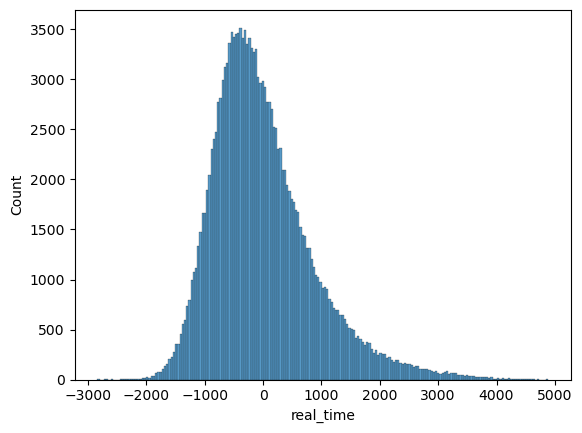

In [121]:
# Normality
sns.histplot(resids)

The distribution of error is indeed bell shaped, implying that the normality assumption is not violated.

Next, let's go to Homocedasticity assumption: the errors of the model must be constant across different values of the target feature.



<Axes: ylabel='real_time'>

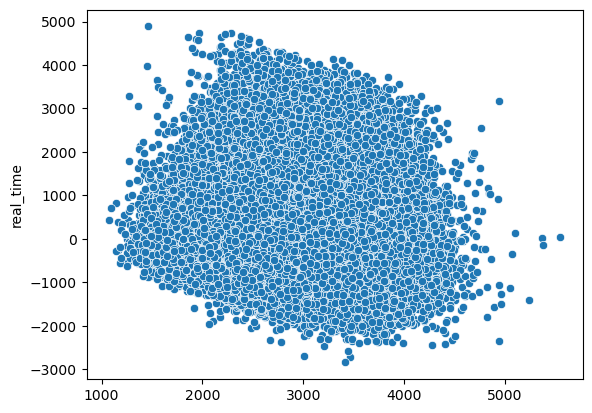

In [122]:
# Homocedasticity
sns.scatterplot(x = fitted, y = resids)

We can see that the model errors are randomly distributed across the fitted values, indicating that homocedasticity assumption is met.

The next assumption is multicollinearity. If the predictor features are highly correlated, the coeficients are not very reliable.

In [72]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["cols"] = X.columns
vif

D:\Ana\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\Ana\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF,cols
0,1.186355,num_distinct_items
1,2.423857,total_outstanding_orders
2,1.084876,busy_dasher_pct
3,1.142071,estimated_combined_duration
4,1.351973,avg_price
...,...,...
107,inf,hour_13
108,inf,hour_14
109,inf,hour_15
110,inf,rush_hour_non_rush


In [73]:
vif[np.isfinite(vif["VIF"]) == True]

,VIF,cols
0,1.186355,num_distinct_items
1,2.423857,total_outstanding_orders
2,1.084876,busy_dasher_pct
3,1.142071,estimated_combined_duration
4,1.351973,avg_price


The vif score of our predictor variables are all lower than 3. This doesn't violate the Multicollinearity assumption.

The table below is the coeficients of each feature variable. A coefficient of 'n' signifies that when the feature variable increases by 1 unit, the target variable is expected to increase by 'n' units. A larger a coeficient is, the more a variable contributes to the variance of the target variable.

In [74]:
pd.DataFrame({"col": X.columns, "coef": model.coef_}).sort_values("coef")

,col,coef
32,store_primary_category_chocolate,-627.535052
71,store_primary_category_singaporean,-443.864139
43,store_primary_category_german,-260.617843
96,hour_21,-249.460882
73,store_primary_category_soup,-244.167327
...,...,...
33,store_primary_category_comfort-food,363.150925
20,store_primary_category_brazilian,398.123618
89,order_protocol_6.0,434.879404
101,hour_7,448.466878


# Regression tree

The next model we'll be building is regression tree.

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
rt = DecisionTreeRegressor()

Here I use grid search to fine-tune the parameters for better model performance.

In [77]:
%%time
from sklearn.model_selection import GridSearchCV
params = {"max_depth": [3,5,7,9,None],
         "min_samples_split": [2,4,6,8],
         "min_samples_leaf": [1,3,5],
         "max_features": [1,3,5,"sqrt"]}
scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]
rt_cv = GridSearchCV(estimator=rt, param_grid=params, cv=5, scoring= scoring, refit = "r2")

rt_cv.fit(X_train, y_train)

CPU times: total: 4min 52s
Wall time: 4min 53s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'max_features': [1, 3, 5, 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             refit='r2',
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_mean_squared_error'])

Below are the model's best parameters and best R squared score.

In [78]:
rt_cv.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [80]:
rt_cv.best_score_

0.14329022208932482

In [81]:
preds = rt_cv.best_estimator_.predict(X_test)

In [82]:
print("R2:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.15328060006212485
MAE: 708.6516154830138
MSE: 852907.0659742624
RMSE: 923.5296779065968


The overall performance of regression tree is not as good as linear regression.

# RANDOM FOREST REGRESSION

The final model I use is random forest regression. This is an ensemble method based on the wisdom of the crowd theory in which a large amount of regression trees are built and the final result would be the combined result of those individual trees.

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rfr = RandomForestRegressor(random_state=0)

In [128]:
%%time
params = {'n_estimators': [100, 50],     
          'max_depth': [10, 20],
          'min_samples_split': [2, 5],   
          'min_samples_leaf': [1, 2]}
scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]
rfr_cv = GridSearchCV(estimator=rfr, param_grid=params, cv=5, scoring= scoring, refit = "r2")

rfr_cv.fit(X_train, y_train)

CPU times: total: 1h 52min 46s
Wall time: 1h 53min 8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 50]},
             refit='r2',
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_mean_squared_error'])

Below are our model's best parameters and R squared of training set.

In [129]:
rfr_cv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [130]:
rfr_cv.best_score_

0.27076753909438817

In [131]:
preds = rfr_cv.best_estimator_.predict(X_test)

In [132]:
print("R2:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.2803172069002765
MAE: 648.9476286598422
MSE: 724942.0995194915
RMSE: 851.4353172845789


The regression random forest performs the best out of the 3 models we have been building with overall higher R squared and lower error. Ultimately, this is our champion model.